In [2]:
import pandas as pd
import pandas_access as mdb
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = pd.read_pickle("data/df.pkl")

In [66]:
df["SKU"] = df.SKU.str.strip()

In [4]:
df2 = df[["INV_NO", "SKU"]]
df2["INV_NO"] = df2["INV_NO"].str.strip()

/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
skus = df2.SKU.unique()
invnos = df2.INV_NO.unique()

In [6]:
#df3 = pd.get_dummies(df2, columns=["SKU"])
new_df = pd.DataFrame(np.zeros([402055, 4779]), columns = skus, index = invnos)

In [7]:
v_smol = df2.iloc[600000:, :]

In [8]:
for idx, row in df2.iterrows():
    i = row.INV_NO
    sku = row.SKU
    new_df.loc[i,sku] = 1

In [9]:
new_df.to_pickle("data/inv_no_and_skus.pkl")

In [12]:
arr = new_df

In [14]:
mat = pd.DataFrame(index=arr.columns)
for each in arr.columns:
    ss = arr[arr[each] == 1]
    num = ss.shape[0]
    count = ss.sum(axis=0)
    mat[each] = count

In [15]:
mat.head()

,1540,1558,1518,1192,1697,1528,1537,1221,1797,1370,...,843495006948,628335000016,030712000654,NOT IN INV,5039,771541817692,9499,628335002058,846682006264,628335002041
1540,4275.0,10.0,150.0,10.0,0.0,50.0,12.0,0.0,47.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1558,10.0,114.0,8.0,2.0,0.0,4.0,3.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1518,150.0,8.0,3858.0,16.0,0.0,39.0,21.0,0.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1192,10.0,2.0,16.0,1745.0,0.0,8.0,5.0,0.0,34.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mat = mat.set_index(mat.index.astype(int))
mat = mat.sort_index()
mat = mat.transpose()
mat = mat.set_index(mat.index.astype(int))
mat = mat.sort_index()

In [ ]:
mat = pd.dtafram(index=arrr.columns)
for each in arr.coluns:
    ss = arr[arr[each] == 1]
    num = ss.shape[0]
    count = ss.sum(axis=0)
    mat[each] = np.round(count/num, 2)
mat = mat.set_index(mat.index.astype(int))
mat = mat.sort_index()
mat = mat.transpose()
mat = mat.set_index(mat.index.astype(int))
mat = mat.sort_index()

In [17]:
pca = PCA(n_components=2)
pca.fit(mat)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
cluster = pd.DataFrame(pca.components_.transpose(), index=mat.index, columns=["PCA-0", "PCA-1"])


In [32]:
len(pca.components_[0])

4779

In [42]:
cluster["k-means"] = t


In [61]:
len(df.DESC.unique()), len(df.SKU.unique())

(7707, 4779)

In [68]:
lst = ['6', '198', '385', '505', '969']
df.loc[df["SKU"].isin(lst)]

,INV_NO,SKU,QTY,CUST_NO,PRICE,TAX1,CLERK,GROUP,REG_ID,DISCOUNT,...,TIME,TYPE,RETFLAG,REGPRICE,VENDOR,year,month,day,weekday,profit


In [69]:
df.head()

,INV_NO,SKU,QTY,CUST_NO,PRICE,TAX1,CLERK,GROUP,REG_ID,DISCOUNT,...,TIME,TYPE,RETFLAG,REGPRICE,VENDOR,year,month,day,weekday,profit
0,1,1540,0.25,NaN,18.4,0.00,TIA,TEA,NaN,0.0,...,11:04,P,NaN,18.4,S&V,1996,05,05,6,3.0625
1,1,1558,0.25,NaN,39.0,0.00,TIA,TEA,NaN,0.0,...,11:04,P,NaN,39.0,S&V,1996,05,05,6,6.5000
2,1,1518,0.25,NaN,21.0,0.00,TIA,TEA,NaN,0.0,...,11:04,P,NaN,21.0,BWT,1996,05,05,6,3.5125
3,2,1192,1.00,NaN,26.0,2.13,KAR,ACC,NaN,0.0,...,11:28,P,NaN,26.0,WAC,1996,05,05,6,13.5000
4,3,1697,1.00,NaN,96.0,7.87,TIA,POT,NaN,0.0,...,11:39,P,NaN,96.0,KSO,1996,05,05,6,48.0000


In [90]:
seven = cluster[cluster["k-means"] == 7].index
seven = seven.unique()
six = cluster[cluster["k-means"] == 6].index
six = six.unique()
five = cluster[cluster["k-means"] == 5].index
four = cluster[cluster["k-means"] == 4].index
three = cluster[cluster["k-means"] == 3].index
two = cluster[cluster["k-means"] == 2].index
one = cluster[cluster["k-means"] == 1].index

In [93]:
# make dictionary for descriptions

for x in seven:
    print(df[df["SKU"] == x]["DESC"].unique())

['Decaf OP' 'decaf op @ cost' 'Decaf Black Currant'
 'Decaf Black Currant Bulk']
['Kenya Marinyn' 'Kenya Tea @ cost + Disc.' 'Tea @ cost + Disc'
 'Marinyn Estate Kenya' 'Kenya @ cost + Disc' 'Kenya Marinyn @ Cost'
 'Tea @ cost' 'Milima Estate Kenya' 'Kenya' 'Millima Estate @ Cost +'
 'Milima Estate']
['Mango' 'Mango DISCON']
['Corsley Estate Nilgiri' 'Nilgiri @cost + Disc']
['Margrets Hope Darj' "M's Hope @cost + disc." "margaret's @ cost"
 "Margaret's Hope @ Cost +" "M's Hope @ cost + Disc"
 'Margrets Hope Darj Vintage' 'Earl Grey Creme' 'Earl Grey Creme Bulk']
['Mim darjeeling tea' 'Mim Darjeeling']
['Kyoto' 'Temple Pine Kyoto Bancha' 'Kyoto Bancha' 'Mt. Kenya Estate'
 'Mt. Kenya Estate Bulk']
['Formosa Oolong' 'Black Dragon Oolong' 'Sencha Hanase'
 'Young Pine NeedleSencha Hanase' 'Sencha Fukujyu' 'sencha hanase'
 'Tahitian Blend' 'Tahitian Blend Bulk']
['Swiss Gold 1C Infuser bk' 'swiss gold infuser'
 'Swiss Gold @ cost + Disc' 'Swiss Gold 1C Infuser' 'Swiss Gold 1C TF300'
 'swiss 

['Golden Monkey' 'Golden Monkey 2013' 'Golden Monkey 2014'
 'Golden Monkey Bulk']
['Doomur Dullung Estate Assam']
['Peppermint Bark' 'Peppermint Bark Bulk 2017']
['X-tra fine strainer & dish']
['Strawberries & Cream' 'Strawberries & Cream Bulk']
['2 inch snap mesh' 'Snap Mesh Infuser 2"']
['Spiced Pear' 'Spiced Pear Bulk 2017']
['4 Sample Teas in bag']
['White Peach' 'White Peach Bulk']


In [36]:
from sklearn.cluster import KMeans
km = KMeans()


In [38]:
t = km.fit_predict(pca.components_.transpose())
        

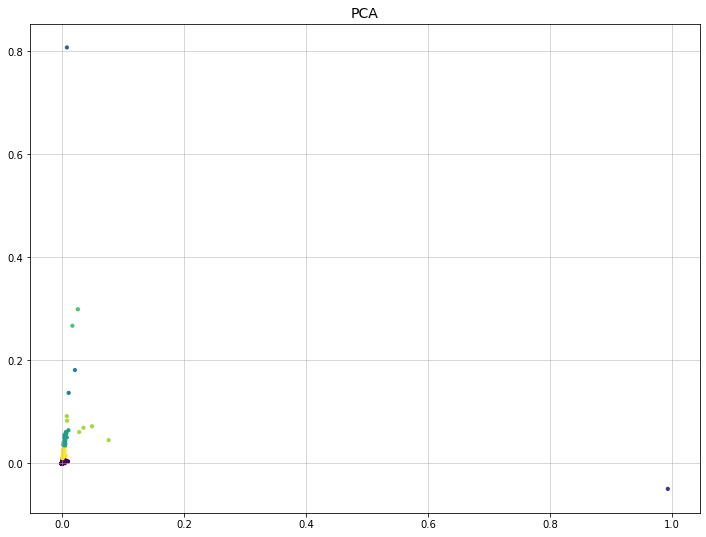

In [40]:
col_keys = np.unique(t)
          
fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(pca.components_[0], pca.components_[1], s=10, c=t);
ax.set_title('PCA', fontsize=14)
ax.grid(which='both', axis='both', linewidth=.5)